
# Project: Investigating Medical Appointments Scheduling in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this project is to investigate a dataset containing records of scheduled medical appointments in Brazil. The goal of the project is to understand how certain factors could possibly affect whether or not people show up for scheduled appointments. We focus on some variables of interest to help us achieve our set goal. 

At the end of this project, we want to be able to answer the following questions:

- How does gender affect number of appointments missed?
- Do patients who receive the Bolsa Família Scholarship tend to show up to more appointments than patients who do not?
- How do Hypertension patients tend to respond to medical appointments?
- Do patients who have one or more SMS messages sent to them tend to show up to more or less appointments than patients who do not?
- How does Scholarship affect male and female missed appointment rates?
- How do SMS reminders affect the missed appointment rates of Hypertension patients?

To begin the project, we start by importing the relevant Python modules that will be used.

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

After successfully importing all necessary packages for this project, we then move on to the data wrangling section

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load the data to be investigated, check for cleanliness and clean the dataset, ensuring it is ready for analysis.

### Load the Data

We begin by loading the dataset to be investigated. This dataset can be downloaded [here](https://www.kaggle.com/joniarroba/noshowappointments). We will also take a quick glance at the first 5 columns to get a feel for what the data looks like. The code block to do these is found in the cell below.

In [2]:
# Load data and view the first 5 columns
df = pd.read_csv('data/appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We notice something interesting in the PatientId column. The records in this column look a bit odd. They seem to be in the wrong format. 

We also see that the No-show column is currently categorical. This is not ideal in this case. 

These anomalies will be addressed in the next two sub-sections.

#### Column Descriptions

01 - PatientId
Identification of a patient

02 - AppointmentID
Identification of each appointment

03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.

05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.

06 - Age
How old is the patient.

07 - Neighbourhood
Where the appointment takes place.

08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension
True or False

10 - Diabetes
True or False

11 - Alcoholism
True or False

12 - Handcap
True or False

13 - SMS_received
1 or more messages sent to the patient.

14 - No-show
True or False.

(Source: Kaggle)

### Check for cleanliness

There are three common factors (amongst others) to look into when determining the cleanliness of a dataset. These are:

- Duplication in rows
- Missing values and the columns that have them
- Incorrect Data types in columns

First, we identify these major issues, then we check for any possible minor issues, before we finally clean the data itself. 

In [3]:
# Checking for duplicates
print('DUPLICATE VALUES IN EACH COLUMN')
print(' ')
for i,v in enumerate(df.columns):
    print(v+':', sum(df[v].duplicated()))
    
print(' ')
print('NUMBER OF ROW LEVEL DUPLICATES: ', sum(df.duplicated()))

DUPLICATE VALUES IN EACH COLUMN
 
PatientId: 48228
AppointmentID: 0
Gender: 110525
ScheduledDay: 6978
AppointmentDay: 110500
Age: 110423
Neighbourhood: 110446
Scholarship: 110525
Hipertension: 110525
Diabetes: 110525
Alcoholism: 110525
Handcap: 110522
SMS_received: 110525
No-show: 110525
 
NUMBER OF ROW LEVEL DUPLICATES:  0


The only duplicate values that might need adjusting would be values in the PatientId column. This will be addressed later.

In [4]:
# Checking for null/missing values in each column. There are no missing values
for i, v in enumerate(df.columns):
    if sum(df[v].isnull()) == 0:
        print(i,v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


There were no null/missing values found.

In [5]:
# Checking for incorrect data types in each column. Some columns have incorrect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Some columns have incorrect data types.

From our brief cleanliness check on the common cleanliness factors, we can identify the following issues:
- PatientId (multiple appointments for the same patient): More on this in the Data Cleaning subsection
- PatientId (data type should be object - string specifically)
- AppointmentId (data type should be object - string specifically)
- ScheduledDay (data type should be datetime)
- AppointmentDay (data type should be datetime)
- No-show (values should be 1 and 0 not 'Yes' and 'No'; data type should also be int not object)
- Spelling errors in Hipertension column (should be spelled Hypertension) and Handcap column (should be Handicap)
- Some scheduled dates and/or times seem to be after the Appointment dates and/or times for some patients. Logically this does not make any sense. Hence, we have to decide how to deal with those (more on this in the next subsection).

### Data Cleaning 
In this subsection, we address the cleanliness problems found earlier in an organized manner as shown in the next few cells. Remember the four issues found: Duplicates, Incorrect data types, column spelling errors and a logical error with the dates.

Firstly, let's address incorrect data types.

In [6]:
# Change the data types
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Map No-show column from "Yes" and "No" to 1 and 0, then change the data type
df['No-show'] = df['No-show'].map(lambda x: 1 if x == 'Yes' else 0)
df['No-show'] = df['No-show'].astype(int)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
8,56394729949972.0,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0


In the cell above, we changed the data types for the PatientId, AppointmentID, ScheduledDay, AppointmentDay and No-show columns. We also changed the values in the No-show column from categorical to numerical values, while still retaining it's meaning.

Let's check the data types using df.info() to make sure we got the changes we wanted.

In [7]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Looks good to me! Next, let's address duplicates by taking a closer look at the PatientId column. We can take 2 samples where this column is duplicated an examine the other columns for each duplicated row.

In [8]:
df[df['PatientId'].duplicated()].sample(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
48378,91677748298658.0,5658158,M,2016-05-04 10:36:49+00:00,2016-05-04 00:00:00+00:00,59,PIEDADE,0,1,0,0,0,0,0
67412,441749369658899.0,5686801,M,2016-05-11 14:07:04+00:00,2016-05-11 00:00:00+00:00,76,JARDIM CAMBURI,0,0,0,0,0,0,0


In [9]:
df[df['PatientId'] == '3725179745141.0']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
14494,3725179745141.0,5581655,F,2016-04-14 08:24:05+00:00,2016-05-24 00:00:00+00:00,47,BENTO FERREIRA,0,1,0,0,0,1,0
27506,3725179745141.0,5226266,F,2016-01-07 09:49:06+00:00,2016-05-19 00:00:00+00:00,47,BENTO FERREIRA,0,1,0,0,0,0,0
27727,3725179745141.0,5557144,F,2016-04-07 13:55:00+00:00,2016-05-03 00:00:00+00:00,47,BENTO FERREIRA,0,1,0,0,0,1,0
35202,3725179745141.0,5651053,F,2016-05-03 08:22:17+00:00,2016-05-16 00:00:00+00:00,47,BENTO FERREIRA,0,1,0,0,0,0,0


In [10]:
df[df['PatientId'] == '99976271368587.0']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
57601,99976271368587.0,5683648,M,2016-05-11 07:44:08+00:00,2016-05-11 00:00:00+00:00,16,NOVA PALESTINA,0,0,0,0,0,0,0
94046,99976271368587.0,5756332,M,2016-06-01 08:12:18+00:00,2016-06-01 00:00:00+00:00,16,NOVA PALESTINA,0,0,0,0,0,0,0


From our examination, we can see that there isn't much of a difference between the duplicated rows. The differences we see are in the ScheduledDay, AppointmentDay and SMS_received columns. 

Since these differences aren't too significant to the dependent variable 'No-show' (remains unchanged) and too maintain fairness for our analysis, we opt to drop all rows with duplicate PatientId values. This will ensure that every patient entry is unique.

In [11]:
# Drop rows with PatientId duplicates and confirm
df.drop_duplicates(subset = 'PatientId', inplace = True)
print('PatientId duplicates: ',sum(df['PatientId'].duplicated()))

PatientId duplicates:  0


Note: The action in the cell above should have reduced the number of rows in our dataset by 48228. So, the new number of rows should be 62299

In [12]:
# Check for number of rows
print('Number of Rows: ',df.shape[0])

Number of Rows:  62299


Next, we address the incorrectly spelled column names, after which we drop rows that have Scheduled days and/or times entered as after Appointment days and/or times. We then check these two corrections using df.head()

In [13]:
# Replace the incorrectly spelled column names
df.rename(columns= {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)

In [14]:
# Drop the columns with scheduled dates and/or times showing as after appointment dates and/or times
df_discard = df[df['ScheduledDay'] > df['AppointmentDay']]
df = df.drop(df_discard.index)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0
10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0


Next, we renumber the indexes for organizational purposes. Then, we do another check to make sure that worked.

In [15]:
# Renumber indexes
df = df.reset_index(drop = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
1,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
2,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
3,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0
4,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0


It worked! Next let's check info to verify that everything is good.

In [16]:
# Verify cleanliness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40756 entries, 0 to 40755
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       40756 non-null  object             
 1   AppointmentID   40756 non-null  object             
 2   Gender          40756 non-null  object             
 3   ScheduledDay    40756 non-null  datetime64[ns, UTC]
 4   AppointmentDay  40756 non-null  datetime64[ns, UTC]
 5   Age             40756 non-null  int64              
 6   Neighbourhood   40756 non-null  object             
 7   Scholarship     40756 non-null  int64              
 8   Hypertension    40756 non-null  int64              
 9   Diabetes        40756 non-null  int64              
 10  Alcoholism      40756 non-null  int64              
 11  Handicap        40756 non-null  int64              
 12  SMS_received    40756 non-null  int64              
 13  No-show         40756 non-null 

Our final, cleaned dataset now has 40756 entries with unique Patient IDs, correct data types and a logical sequence of Scheduled Dates and Appointment dates. To do a quick visual check. Let's take a random sample of 30 rows to see if we find anything else.

In [17]:
df.sample(30)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
17335,84629712936976.0,5548826,M,2016-04-06 09:03:11+00:00,2016-05-30 00:00:00+00:00,0,ROMÃO,0,0,0,0,0,0,0
4309,6558886528795.0,5636775,F,2016-04-28 16:03:02+00:00,2016-05-02 00:00:00+00:00,32,ARIOVALDO FAVALESSA,0,1,0,0,0,1,1
8683,1927862148247.0,5669041,F,2016-05-06 10:15:01+00:00,2016-05-11 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0
10837,453411744227364.0,5633523,F,2016-04-28 09:33:09+00:00,2016-05-04 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,0
12140,4961833795833.0,5622783,F,2016-04-26 13:03:54+00:00,2016-05-16 00:00:00+00:00,22,JESUS DE NAZARETH,0,0,0,0,0,0,1
3142,26524964232267.0,5683098,F,2016-05-11 07:13:52+00:00,2016-05-13 00:00:00+00:00,62,JARDIM CAMBURI,0,0,0,0,0,0,0
23382,839398956453569.0,5630622,F,2016-04-27 15:49:12+00:00,2016-05-03 00:00:00+00:00,61,CARATOÍRA,0,0,0,0,0,1,1
23802,2676296422416.0,5506849,M,2016-03-23 11:02:43+00:00,2016-05-05 00:00:00+00:00,68,JESUS DE NAZARETH,0,0,0,0,0,1,1
1111,433911537936899.0,5522735,F,2016-03-29 14:59:56+00:00,2016-04-29 00:00:00+00:00,41,JABOUR,0,0,0,0,0,1,0
32628,18325821181539.0,5669116,M,2016-05-06 10:21:40+00:00,2016-05-31 00:00:00+00:00,8,FONTE GRANDE,0,0,0,0,0,1,1


Looks good to me! Of course, data cleaning is an iterative process, and we may not have caught everything on the first try, especially for such a large dataset. But for the purpose of this project's setup, this would do. Now we can move on the the Exploratory Data Analysis phase of the project.

<a id='eda'></a>
## Exploratory Data Analysis

### Summary Statistics
Before addressing the questions asked in the Introduction section, let's examine some summary statistics

In [18]:
# Summary statistics
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,40756.000000,40756.000000,40756.000000,40756.000000,40756.000000,40756.000000,40756.000000,40756.000000
mean,38.378815,0.087742,0.208779,0.073363,0.023334,0.019089,0.500393,0.281676
std,23.329187,0.282922,0.406441,0.260735,0.150964,0.151963,0.500006,0.449822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


From the summary statistics above, we see that the most prevalent patients that scheduled appointments were Hypertension patients (20%). We also see that about 50% of patients that scheduled appointments received SMS reminders. 28% of people with scheduled appointments did not show up for their appointments. About 9% of patients who scheduled appointments received the Bolsa Família Scholarship.

The gender column is omitted from summary statistics because it is a categorical variable (although we could change it to an integer column by assigning 0 and 1 values for male and female or vice-versa, we opt to keep it as categorical for the purpose of table clarity). The Neighborhood column is also omitted for the same reason.

Let's examine the distribution of each numeric variable visually.

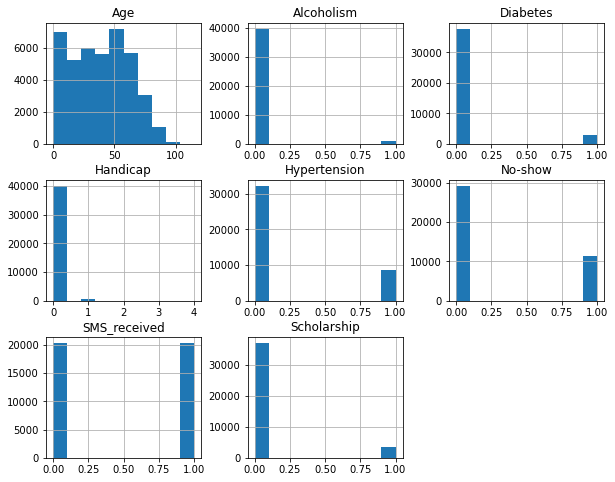

In [19]:
df.hist(figsize = (10,8));

From the histograms above, we get a more visual look at eack variable's distribution. This complements the summary statistics table we saw previously.

Moving to the research questions, we will be tackling the following questions in this section:

- How does gender affect number of appointments missed?
- Do patients who receive the Bolsa Família Scholarship tend to show up to more or less appointments than patients who do not?
- How do Hypertension patients tend to respond to medical appointments?
- Do patients who have one or more SMS messages sent to them tend to show up to more or less appointments than patients who do not?

Our dependent variable is 'No-shows'. Each question above addresses how various independent variables could relate with the dependent variable.

#### Note: The above statement does not imply causation.

### plot_bar function
For ease of single bar chart plotting, we write a plot_bar function to be used subsequently.

In [20]:
# Bar chart plot function
def plot_bar(heights, labels, plot_title, x, y):
    loc = list(range(1,len(heights) + 1))
    plt.bar(loc, heights, tick_label = labels)
    plt.title(plot_title)
    plt.xlabel(x)
    plt.ylabel(y)

Note: Some cells in this section will output some values. These values are described using print functions. Follow along.

### Research Question 1: 
How does gender affect number of appointments missed?

In [21]:
# Count of males and Females
males_count = len(df[df['Gender'] == 'M'])
females_count = len(df[df['Gender'] == 'F'])
print('Number of Males: ', males_count)
print('Number of Females: ', females_count)

Number of Males:  14113
Number of Females:  26643


In [22]:
# Appointments missed by males and females
male_missed = len(df[(df['Gender'] == 'M') & (df['No-show'] == 1)])
female_missed = len(df[(df['Gender'] == 'F') & (df['No-show'] == 1)])
print('Males missed: ', male_missed)
print('Females missed: ', female_missed)

Males missed:  4048
Females missed:  7432


In [23]:
# Proportions
prop_male = round(male_missed/males_count, 2)
prop_female = round(female_missed/females_count, 2)
print('Proportion of males that missed appointments: ', prop_male)
print('Proportion of females that missed appointments: ', prop_female)

Proportion of males that missed appointments:  0.29
Proportion of females that missed appointments:  0.28


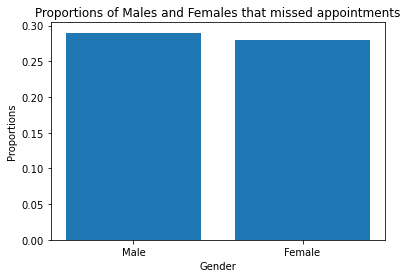

In [24]:
# Plot proportions of males and females missed
plot_title = 'Proportions of Males and Females that missed appointments'
x = 'Gender'
y = 'Proportions'
gender_props = plot_bar([prop_male,prop_female],['Male','Female'], plot_title, x, y)

### Research Question 2: 
Do patients who receive the Bolsa Família Scholarship tend to show up to more or less appointments than patients who do not?

In [25]:
# Count of Scholarship and non-scholarship recipients
schol_count = len(df[df['Scholarship'] == 1])
non_schol_count = len(df[df['Scholarship'] == 0])
print('Number of Scholarship Recipients: ', schol_count)
print('Number of Non-Scholarship Recipients: ', non_schol_count)

Number of Scholarship Recipients:  3576
Number of Non-Scholarship Recipients:  37180


In [26]:
# Appointments missed by scholarship recipients and non-scholarship
schol_missed = len(df[(df['Scholarship'] == 1) & (df['No-show'] == 1)])
no_schol_missed = len(df[(df['Scholarship'] == 0) & (df['No-show'] == 1)])
print('Scholarship Recipients Missed: ', schol_missed)
print('No scholarship Missed: ', no_schol_missed)

Scholarship Recipients Missed:  1232
No scholarship Missed:  10248


In [27]:
# Proportions
prop_schol = round(schol_missed/schol_count, 2)
prop_no_schol = round(no_schol_missed/non_schol_count, 2)
print('Proportion of scholarship recipients that missed appointments: ', prop_schol)
print('Proportion of people with no scholarships that missed appointments: ', prop_no_schol)

Proportion of scholarship recipients that missed appointments:  0.34
Proportion of people with no scholarships that missed appointments:  0.28


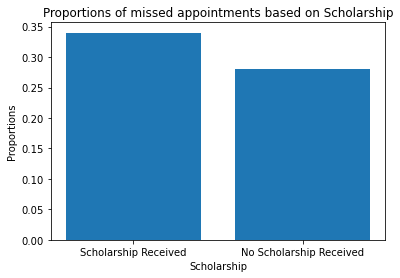

In [28]:
# Plot of proportions
plot_title = 'Proportions of missed appointments based on Scholarship'
x = 'Scholarship'
y = 'Proportions'
schol_props = plot_bar([prop_schol,prop_no_schol],['Scholarship Received','No Scholarship Received'], plot_title, x, y)


### Research Question 3: 
How do Hypertension patients tend to respond to medical appointments?

In [29]:
# Count of Hypertension and non-hypertension patients
hyp_count = len(df[df['Hypertension'] == 1])
non_hyp_count = len(df[df['Hypertension'] == 0])
print('Number of Hypertension Patients: ', hyp_count)
print('Number of Non-Hypertension Patients: ', non_hyp_count)

Number of Hypertension Patients:  8509
Number of Non-Hypertension Patients:  32247


In [30]:
# Appointments missed by Hypertension and non-hypertension patieents
hyp_missed = len(df[(df['Hypertension'] == 1) & (df['No-show'] == 1)])
non_hyp_missed = len(df[(df['Hypertension'] == 0) & (df['No-show'] == 1)])
print('Hypertension patients Missed: ', hyp_missed)
print('Non-Hypertension patients Missed: ', non_hyp_missed)

Hypertension patients Missed:  1903
Non-Hypertension patients Missed:  9577


In [31]:
# Proportions
prop_hyp = round(hyp_missed/hyp_count, 2)
prop_no_hyp = round(non_hyp_missed/non_hyp_count, 2)
print('Proportion of Hypertension patients that missed appointments: ', prop_hyp)
print('Proportion of Non-Hypertension patients that missed appointments: ', prop_no_hyp)

Proportion of Hypertension patients that missed appointments:  0.22
Proportion of Non-Hypertension patients that missed appointments:  0.3


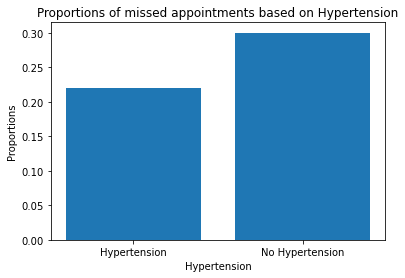

In [32]:
# Plot of proportions
plot_title = 'Proportions of missed appointments based on Hypertension'
x = 'Hypertension'
y = 'Proportions'
alcohol_props = plot_bar([prop_hyp,prop_no_hyp],['Hypertension','No Hypertension'], plot_title, x, y)

### Research Question 4: 
Do patients who have one or more SMS messages sent to them tend to show up to more or less appointments than patients who do not?

In [33]:
# Count of SMS Received and No SMS Received
sms_count = len(df[df['SMS_received'] == 1])
no_sms_count = len(df[df['SMS_received'] == 0])
print('Number of patients who received SMS: ', sms_count)
print('Number of patients who did not receive SMS: ', no_sms_count)

Number of patients who received SMS:  20394
Number of patients who did not receive SMS:  20362


In [34]:
# Appointments missed by sms recipients and no sms 
sms_missed = len(df[(df['SMS_received'] == 1) & (df['No-show'] == 1)])
no_sms_missed = len(df[(df['SMS_received'] == 0) & (df['No-show'] == 1)])
print('SMS Recipients Missed: ', sms_missed)
print('No SMS received Missed: ', no_sms_missed)

SMS Recipients Missed:  5491
No SMS received Missed:  5989


In [35]:
# Proportions
prop_sms = round(sms_missed/sms_count, 2)
prop_no_sms = round(no_sms_missed/no_sms_count, 2)
print('Proportion of SMS Recipients that missed appointments: ', prop_sms)
print('Proportion of patients with No SMS received that missed appointments: ', prop_no_sms)

Proportion of SMS Recipients that missed appointments:  0.27
Proportion of patients with No SMS received that missed appointments:  0.29


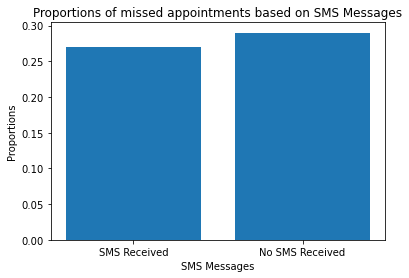

In [36]:
# Plot of proportions
plot_title = 'Proportions of missed appointments based on SMS Messages'
x = 'SMS Messages'
y = 'Proportions'
alcohol_props = plot_bar([prop_sms,prop_no_sms],['SMS Received','No SMS Received'], plot_title, x, y)

### Research Question 5:
How does Scholarship affect male and female missed appointment rates?

In [37]:
# Males and Females with Scholarship
males_scholarship = len(df[(df['Gender'] == 'M') & (df['Scholarship'] == 1)])
females_scholarship = len(df[(df['Gender'] == 'F') & (df['Scholarship'] == 1)])
print('Males with Scholarship: ', males_scholarship)
print('Females with Scholarship: ', females_scholarship)

Males with Scholarship:  643
Females with Scholarship:  2933


In [38]:
# Males and Females with Scholarship and missed appointments
males_schol_missed = len(df[(df['Gender'] == 'M') & (df['Scholarship'] == 1) & (df['No-show'] == 1)])
females_schol_missed = len(df[(df['Gender'] == 'F') & (df['Scholarship'] == 1) & (df['No-show'] == 1)])
print('Males with Scholarship who missed appointments: ', males_schol_missed)
print('Females with Scholarship who missed appointments: ', females_schol_missed)

Males with Scholarship who missed appointments:  221
Females with Scholarship who missed appointments:  1011


In [39]:
# Males and Females without Scholarship 
males_no_scholarship = len(df[(df['Gender'] == 'M') & (df['Scholarship'] == 0)])
females_no_scholarship = len(df[(df['Gender'] == 'F') & (df['Scholarship'] == 0)])
print('Males without Scholarship: ', males_no_scholarship)
print('Females without Scholarship: ', females_no_scholarship)

Males without Scholarship:  13470
Females without Scholarship:  23710


In [40]:
# Males and Females without Scholarship and missed appointments
males_no_schol_missed = len(df[(df['Gender'] == 'M') & (df['Scholarship'] == 0) & (df['No-show'] == 1)])
females_no_schol_missed = len(df[(df['Gender'] == 'F') & (df['Scholarship'] == 0) & (df['No-show'] == 1)])
print('Males without Scholarship who missed appointments: ', males_no_schol_missed)
print('Females without Scholarship who missed appointments: ', females_no_schol_missed)

Males without Scholarship who missed appointments:  3827
Females without Scholarship who missed appointments:  6421


In [41]:
# Proportions of males and females without scholarships who missed appointments
prop_male_no_schol_missed = round(males_no_schol_missed/males_count, 2)
prop_female_no_schol_missed = round(females_no_schol_missed/females_count, 2)
print('Proportion of Males without Scholarship who missed appointments: ', prop_male_no_schol_missed)
print('Proportion of Females without Scholarship who missed appointments: ', prop_female_no_schol_missed)

Proportion of Males without Scholarship who missed appointments:  0.27
Proportion of Females without Scholarship who missed appointments:  0.24


In [42]:
# Proportions of males and females with scholarship who missed appointments
prop_male_schol_missed = round(males_schol_missed/males_count, 2)
prop_female_schol_missed = round(females_schol_missed/females_count, 2)
print('Proportion of Males with Scholarship who missed appointments: ', prop_male_schol_missed)
print('Proportion of Females with Scholarship who missed appointments: ', prop_female_schol_missed)

Proportion of Males with Scholarship who missed appointments:  0.02
Proportion of Females with Scholarship who missed appointments:  0.04


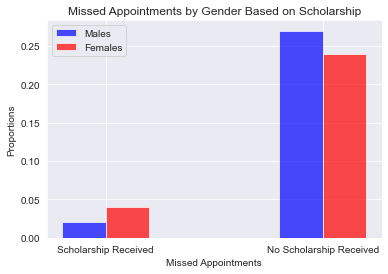

In [43]:
# Plot proportions
sns.set_style("darkgrid")
ind = np.array([1, 2])
width = 0.2
male_proportions = [prop_male_schol_missed, prop_male_no_schol_missed]
female_proportions = [prop_female_schol_missed, prop_female_no_schol_missed]
male_bars = plt.bar(ind, male_proportions, width, color='b', alpha=.7, label='Males')
female_bars = plt.bar(ind + width, female_proportions, width, color='r', alpha=.7, label='Females')

# title and labels
plt.ylabel('Proportions')
plt.xlabel('Missed Appointments')
plt.title('Missed Appointments by Gender Based on Scholarship')
locations = ind + width/2 # xtick locations
labels = ['Scholarship Received', 'No Scholarship Received']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

### Research Question 6:
How do SMS reminders affect the missed appointment rates of Hypertension patients?

In [44]:
# Hypertension Patients and non-Hypertension patients who received SMS Messages
hyp_sms = len(df[(df['Hypertension'] == 1) & (df['SMS_received'] == 1)])
non_hyp_sms = len(df[(df['Hypertension'] == 0) & (df['SMS_received'] == 1)])
print('Hypertension Patients who received SMS: ', hyp_sms)
print('Non-Hypertension Patients who received SMS: ', non_hyp_sms)

Hypertension Patients who received SMS:  3924
Non-Hypertension Patients who received SMS:  16470


In [45]:
# Hypertension Patients and non-Hypertension patients who received SMS but missed appointments
hyp_sms_missed = len(df[(df['Hypertension'] == 1) & (df['SMS_received'] == 1) & (df['No-show'] == 1)])
non_hyp_sms_missed = len(df[(df['Hypertension'] == 0) & (df['SMS_received'] == 1) & (df['No-show'] == 1)])
print('Hypertension Patients who received SMS but missed appointments: ', hyp_sms_missed)
print('Non-Hypertension Patients who received SMS but missed appointments: ', non_hyp_sms_missed)

Hypertension Patients who received SMS but missed appointments:  790
Non-Hypertension Patients who received SMS but missed appointments:  4701


In [46]:
# Hypertension Patients and non-Hypertension patients who did not receive SMS and missed appointments
hyp_missed_no_sms = len(df[(df['Hypertension'] == 1) & (df['SMS_received'] == 0) & (df['No-show'] == 1)])
non_hyp_missed_no_sms = len(df[(df['Hypertension'] == 0) & (df['SMS_received'] == 0) & (df['No-show'] == 1)])
print('Hypertension Patients who did not receive SMS and missed appointments: ', hyp_missed_no_sms)
print('Non-Hypertension Patients who did not receive SMS and missed appointments: ', non_hyp_missed_no_sms)

Hypertension Patients who did not receive SMS and missed appointments:  1113
Non-Hypertension Patients who did not receive SMS and missed appointments:  4876


In [47]:
# Proportions of Hypertension and non-Hypertension Patients who did not receive SMS and missed appointments
prop_hyp_missed_no_sms = round(hyp_missed_no_sms/hyp_count, 2)
prop_non_hyp_missed_no_sms = round(non_hyp_missed_no_sms/non_hyp_count, 2)
print('Proportion of Hypertension Patients who did not receive SMS and missed appointments: ', prop_hyp_missed_no_sms)
print('Proportion of Non-Hypertension Patients who did not receive SMS and missed appointments: ', prop_non_hyp_missed_no_sms)


Proportion of Hypertension Patients who did not receive SMS and missed appointments:  0.13
Proportion of Non-Hypertension Patients who did not receive SMS and missed appointments:  0.15


In [48]:
# Proportions of Hypertension and non-Hypertension Patients who received SMS but missed appointments
prop_hyp_missed_sms = round(hyp_sms_missed/hyp_count, 2)
prop_non_hyp_missed_sms = round(non_hyp_sms_missed/non_hyp_count, 2)
print('Proportion of Hypertension Patients who received SMS but missed appointments: ', prop_hyp_missed_sms)
print('Proportion of Non-Hypertension Patients who received SMS but missed appointments: ', prop_non_hyp_missed_sms)

Proportion of Hypertension Patients who received SMS but missed appointments:  0.09
Proportion of Non-Hypertension Patients who received SMS but missed appointments:  0.15


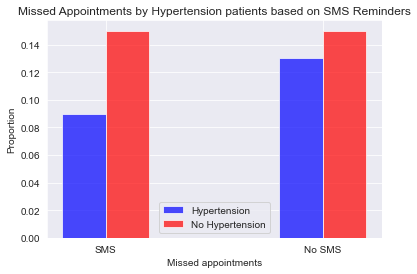

In [49]:
# plot bars
ind = np.array([1, 2])
width = 0.2
hyp_proportions = [prop_hyp_missed_sms, prop_hyp_missed_no_sms]
non_hyp_proportions = [prop_non_hyp_missed_sms, prop_non_hyp_missed_no_sms]
hyp_bars = plt.bar(ind, hyp_proportions, width, color='b', alpha=.7, label='Hypertension')
non_hyp_bars = plt.bar(ind + width, non_hyp_proportions, width, color='r', alpha=.7, label='No Hypertension')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Missed appointments')
plt.title('Missed Appointments by Hypertension patients based on SMS Reminders')
locations = ind + width/2 # xtick locations
labels = ['SMS', 'No SMS']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

<a id='conclusions'></a>
## Conclusions


Six questions where asked and addressed in this project with four independent variables and one dependent variable examined.

We see from the dataset that more males tended to miss appointments than females, though the reverse is the case for the males and females who received the Bolsa Família Scholarship. We also see that there was a higher proportion of both males and females missing appointments when they did not receive the Scholarship. However, when Scholarship is isolated, we see something interesting. On average, Scholarship recipients missed more appointments than those who did not receive scholarships. Given the purpose of the scholarship, this is unexpected. However, it is important to make it clear that this analysis is by no means absolute, and further statistical tests will be required to prove this.

From the dataset, we see that non-hypertension patients missed more appointments than hypertension patients. We see the same trend when SMS reminders are sent. However, on average, the SMS reminders did not seem to affect the non-hypertension patients' missed appointment rate as it stayed the same. We do see that on average, less patients with hypertension missed appointments when SMS reminders were sent. Isolating SMS reminders, we see the same trend.

It is important to reiterate that this exploratory data analysis doesn't give the full picture, hence the term "exploratory". All that was done here was examining trends seen between different variables. Therefore, we cannot state with any certainty that because we observed some trends here, they would be similar in other datasets. To make such predictions with some level of certainty, more complex statistical analysis such as Hypothesis testing and regression (amongst others) would need to be carried out.